In [1]:
# Realizar Importacion 

In [1]:
pip install numpy pandas scikit-learn matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np 


In [ ]:
# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        297 non-null    int64
 1   sex        297 non-null    int64
 2   cp         297 non-null    int64
 3   trestbps   297 non-null    int64
 4   chol       297 non-null    int64
 5   fbs        297 non-null    int64
 6   restecg    297 non-null    int64
 7   thalach    297 non-null    int64
 8   exang      297 non-null    int64
 9   oldpeak    297 non-null    int64
 10  slope      297 non-null    int64
 11  ca         297 non-null    int64
 12  thal       297 non-null    int64
 13  condition  297 non-null    int64
dtypes: int64(14)
memory usage: 32.6 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   

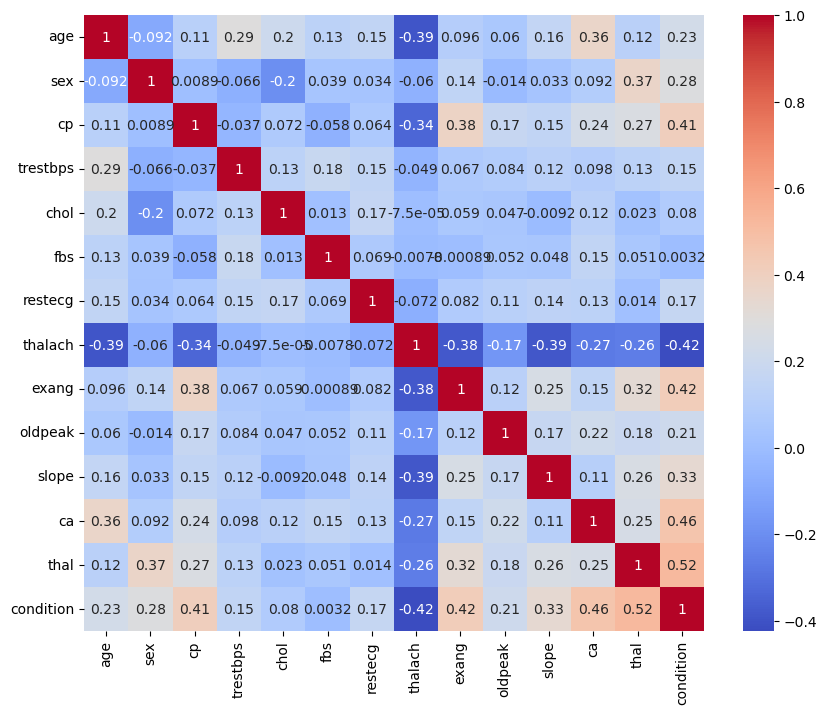

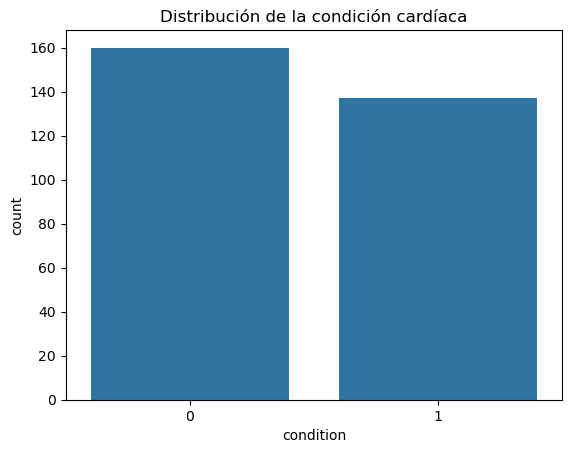

In [3]:
# Cargar el dataset
data = { "age": [ 69, 69, 66, 65, 64, 64, 63, 61, 60, 59, 59, 59, 59, 58, 56, 52, 52, 51, 45, 42, 40, 38, 34, 74, 71, 70, 66, 63, 62, 62, 59, 58, 58, 57, 57, 57, 56, 56, 56, 56, 55, 55, 55, 54, 54, 54, 52, 52, 52, 50, 49, 49, 48, 48, 46, 46, 45, 45, 45, 44, 44, 44, 42, 41, 41, 41, 41, 41, 41, 35, 34, 29, 76, 71, 70, 69, 68, 68, 68, 67, 67, 67, 66, 65, 65, 65, 64, 64, 64, 63, 62, 62, 61, 60, 60, 60, 59, 59, 58, 58, 58, 58, 58, 57, 57, 57, 56, 54, 54, 54, 54, 54, 54, 54, 53, 53, 52, 52, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 49, 49, 48, 48, 47, 47, 47, 46, 46, 44, 44, 44, 44, 44, 43, 43, 42, 42, 42, 41, 41, 41, 39, 39, 39, 37, 37, 77, 71, 70, 70, 68, 67, 67, 67, 67, 67, 67, 66, 66, 66, 66, 65, 65, 65, 65, 64, 64, 64, 64, 64, 63, 63, 63, 63, 63, 63, 62, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 60, 60, 59, 59, 59, 59, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 56, 56, 56, 56, 56, 55, 55, 55, 55, 55, 54, 54, 54, 54, 54, 54, 53, 53, 53, 53, 53, 52, 52, 52, 52, 51, 51, 51, 51, 50, 50, 50, 49, 48, 48, 48, 47, 47, 46, 46, 46, 45, 45, 45, 45, 44, 44, 44, 43, 43, 43, 43, 43, 42, 42, 42, 41, 40, 40, 39, 35, 35, 35 ], "sex": [ 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1 ], "cp": [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3 ], "trestbps": [ 160, 140, 150, 138, 110, 170, 145, 134, 150, 178, 170, 160, 134, 150, 120, 118, 152, 125, 110, 148, 140, 120, 118, 120, 160, 156, 160, 140, 120, 128, 140, 120, 136, 130, 124, 154, 120, 140, 120, 130, 135, 130, 132, 108, 132, 192, 120, 134, 128, 120, 134, 130, 110, 130, 101, 105, 130, 112, 128, 120, 130, 120, 120, 135, 130, 105, 110, 126, 120, 122, 118, 130, 140, 110, 160, 140, 180, 120, 118, 115, 152, 152, 146, 140, 155, 160, 125, 140, 140, 135, 130, 130, 150, 140, 102, 120, 126, 150, 112, 105, 132, 120, 140, 128, 150, 150, 130, 125, 120, 110, 135, 150, 108, 160, 130, 130, 136, 172, 100, 125, 110, 140, 130, 94, 120, 120, 140, 129, 120, 118, 130, 124, 138, 108, 130, 142, 150, 108, 118, 130, 140, 120, 122, 130, 120, 120, 130, 130, 112, 112, 138, 140, 94, 130, 120, 125, 112, 145, 130, 144, 160, 120, 125, 100, 120, 106, 120, 178, 112, 160, 150, 135, 120, 110, 120, 145, 130, 128, 180, 130, 150, 108, 124, 130, 140, 140, 160, 120, 140, 138, 150, 124, 120, 145, 138, 130, 140, 148, 130, 145, 125, 150, 140, 117, 130, 158, 170, 135, 110, 174, 164, 140, 138, 114, 128, 100, 128, 146, 130, 170, 150, 125, 100, 140, 150, 165, 152, 110, 110, 140, 130, 120, 128, 132, 200, 130, 125, 132, 134, 140, 132, 160, 180, 128, 124, 120, 110, 110, 122, 140, 140, 130, 123, 138, 142, 128, 108, 112, 125, 130, 140, 140, 140, 150, 144, 110, 130, 124, 122, 130, 110, 112, 138, 140, 120, 104, 138, 142, 115, 120, 112, 110, 120, 132, 115, 150, 110, 102, 136, 140, 110, 110, 152, 118, 120, 138, 126 ], "chol": [ 234, 239, 226, 282, 211, 227, 233, 234, 240, 270, 288, 273, 204, 283, 193, 186, 298, 213, 264, 244, 199, 231, 182, 269, 302, 245, 246, 195, 281, 208, 221, 284, 319, 236, 261, 232, 240, 294, 236, 221, 250, 262, 342, 309, 288, 283, 325, 201, 205, 244, 271, 266, 229, 245, 197, 204, 234, 160, 308, 263, 219, 220, 295, 203, 204, 198, 235, 306, 157, 192, 210, 204, 197, 265, 269, 254, 274, 211, 277, 564, 212, 277, 278, 417, 269, 360, 309, 335, 313, 252, 231, 263, 243, 185, 318, 178, 218, 212, 230, 240, 224, 340, 211, 229, 168, 126, 256, 273, 258, 214, 304, 232, 267, 201, 197, 246, 196, 199, 222, 245, 175, 308, 256, 227, 295, 219, 233, 196, 188, 149, 275, 255, 257, 243, 253, 177, 231, 141, 242, 233, 235, 226, 213, 315, 240, 209, 180, 214, 250, 268, 220, 321, 199, 250, 215, 304, 149, 174, 322, 193, 286, 229, 254, 299, 237, 223, 302, 228, 212, 228, 225, 254, 177, 248, 246, 212, 303, 263, 325, 254, 407, 269, 197, 330, 187, 268, 164, 267, 394, 294, 244, 209, 260, 307, 166, 330, 207, 203, 206, 282, 258, 258, 293, 230, 253, 305, 326, 234, 239, 249, 176, 177, 271, 318, 216, 248, 259, 218, 197, 225, 270, 300, 234, 192, 276, 289, 274, 201, 335, 241, 131, 354, 303, 207, 288, 283, 249, 184, 409, 217, 353, 289, 327, 205, 266, 188, 239, 206, 286, 239, 203, 264, 282, 234, 226, 255, 233, 230, 212, 305, 298, 261, 299, 243, 200, 254, 269, 274, 222, 256, 275, 204, 243, 311, 249, 208, 236, 309, 260, 169, 290, 197, 177, 341, 303, 247, 211, 265, 315, 226, 172, 167, 223, 219, 198, 183, 282 ], "fbs": [ 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ], "restecg": [ 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2 ], "thalach": [ 131, 151, 114, 174, 144, 155, 150, 145, 171, 145, 159, 125, 162, 162, 162, 190, 178, 125, 132, 178, 178, 182, 174, 121, 162, 143, 120, 179, 103, 140, 164, 160, 152, 174, 141, 164, 169, 153, 178, 163, 161, 155, 166, 156, 159, 195, 172, 158, 184, 162, 162, 171, 168, 180, 156, 172, 175, 138, 170, 173, 188, 170, 162, 132, 172, 168, 153, 163, 182, 174, 192, 202, 116, 130, 112, 146, 150, 115, 151, 160, 150, 172, 152, 157, 148, 151, 131, 158, 133, 172, 146, 97, 137, 155, 160, 96, 134, 157, 165, 154, 173, 172, 165, 150, 174, 173, 142, 152, 147, 158, 170, 165, 167, 163, 152, 173, 169, 162, 143, 166, 123, 142, 149, 154, 157, 158, 163, 163, 139, 126, 139, 175, 156, 152, 179, 160, 147, 175, 149, 179, 180, 169, 165, 162, 194, 173, 150, 168, 179, 172, 152, 182, 179, 187, 170, 162, 125, 125, 109, 141, 108, 129, 163, 125, 71, 142, 151, 165, 132, 138, 114, 127, 140, 158, 96, 132, 122, 105, 154, 147, 154, 169, 136, 132, 144, 160, 145, 99, 157, 106, 154, 163, 140, 146, 125, 169, 138, 161, 132, 142, 141, 157, 170, 160, 144, 161, 140, 161, 142, 143, 90, 162, 182, 140, 131, 122, 130, 105, 131, 146, 111, 171, 156, 148, 112, 124, 88, 126, 143, 123, 115, 163, 159, 168, 133, 103, 144, 105, 150, 111, 132, 145, 117, 130, 109, 113, 126, 108, 116, 160, 155, 143, 95, 160, 111, 161, 147, 160, 168, 142, 122, 186, 173, 128, 126, 159, 163, 166, 186, 150, 118, 143, 152, 120, 144, 148, 152, 147, 185, 144, 153, 177, 120, 136, 181, 171, 161, 122, 125, 178, 158, 114, 181, 140, 130, 182, 156 ], "exang": [ 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1 ], "oldpeak": [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0 ], "slope": [ 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0 ], "ca": [ 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 3, 2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 3, 2, 2, 2, 0, 2, 0, 2, 1, 0, 3, 1, 0, 2, 1, 2, 2, 1, 0, 1, 3, 2, 0, 3, 2, 2, 3, 2, 0, 3, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 3, 3, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 3, 1, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ], "thal": [ 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2 ], "condition": [ 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1 ] }
df = pd.DataFrame(data)
# Resumen de datos y verificación de valores faltantes
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Conteo de valores nulos

# Visualización de correlaciones entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribución de la variable objetivo 'condition'
sns.countplot(x='condition', data=df)
plt.title("Distribución de la condición cardíaca")
plt.show()

In [19]:
# 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [4]:
X = df.drop(columns='condition')
y = df['condition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 3: Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]

print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['thalach', 'ca', 'thal'], dtype='object')


In [6]:
# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [8]:
#5.Entrenar el modelo configurando los diferentes hiperparámetros.

In [9]:
modelo = LogisticRegression(max_iter=200, solver='liblinear')
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [ ]:
# 6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

Precisión: 0.7
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        32
           1       0.68      0.68      0.68        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



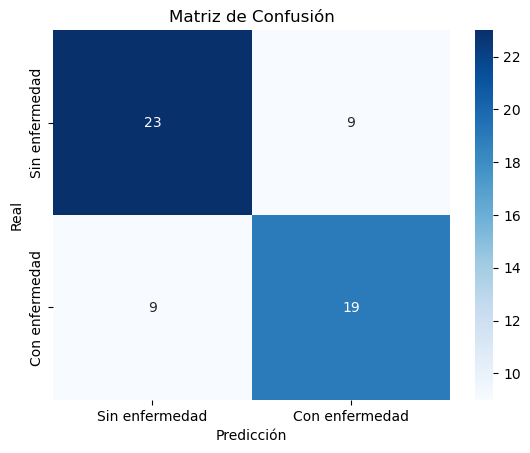

In [10]:
y_pred = modelo.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sin enfermedad', 'Con enfermedad'], yticklabels=['Sin enfermedad', 'Con enfermedad'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
# 7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

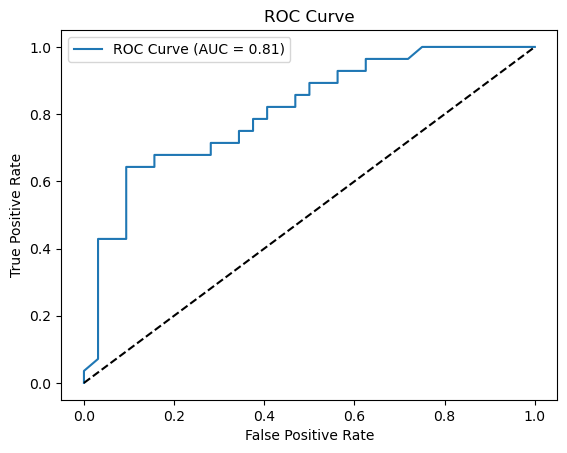

In [11]:

y_pred_proba = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# nueva persona 

In [ ]:
df = pd.DataFrame(data)

# 2. Preprocesar los datos
X = df.drop("condition", axis=1)  # Características
y = df["condition"]                # Variable objetivo

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Evaluar el modelo
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 6. Documentar los resultados (sin logging)
print("Análisis de resultados del modelo de regresión logística")
print(f"Precisión del modelo: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Puntuación F1: {f1:.2f}")

# 7. Predicción para un nuevo paciente
new_patient = np.array([[55, 1, 1, 135, 230, 0, 1, 145, 0, 2.0, 1, 1, 2]])  
new_patient_scaled = scaler.transform(new_patient)  # Normalizar las características

prediction = model.predict(new_patient_scaled)

# 8. Imprimir el resultado de la predicción
if prediction[0] == 1:
    print("El paciente tiene presencia de enfermedad cardíaca.")
else:
    print("El paciente no tiene presencia de enfermedad cardíaca.")

Análisis de resultados del modelo de regresión logística
Precisión del modelo: 0.72
Precisión: 0.67
Recall: 0.79
Puntuación F1: 0.72
El paciente tiene presencia de enfermedad cardíaca.


c:\Users\da98g\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
